In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import GetOldTweets3 as got
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import plotly_express as px

In [3]:
df1=pd.read_json("ol.json")
df2=pd.read_json("ol2.json")
df3=pd.read_json("ol3.json")

In [4]:
frames = [df1,df2,df3]
tw_df = pd.concat(frames)
tw_df

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,"[essay, someone, pay, assignment, homework, On...",[],False,False,0,[],,0,[],...,Chastewriters,The quality of essay we write is coupled with ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:58:54,2020-02-19 23:58:54,1230280630556069888,/Chastewriters/status/1230280630556069889,1045250413358960640,Chaste writers,
1,True,[],[https://pbs.twimg.com/media/ERLUsVLUUAAVQuH.jpg],False,True,0,[http://domycollegealgebra.com],1230265865993625602,0,"[{'screen_name': 'DimpleznTatz', 'user_id': '6...",...,mathexperts1,Let us help with your college algebra ! Check ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:54:28,2020-02-19 23:54:28,1230279516427153408,/mathexperts1/status/1230279516427153408,1052845681595936768,PROFESSIONAL ALGEBRA EXPERTS ARE HERE,
2,False,"[business, Math, Algebra, Calculus, Statistics...",[],True,False,1,[],,1,[],...,Ewritingservic2,Hello there! Kindly HMU for; \n#business law\n...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:54:00,2020-02-19 23:54:00,1230279396096970752,/Ewritingservic2/status/1230279396096970753,1230087509188759552,E writing services,
3,False,"[helloworld, Math, Algebra, Calculus, Statisti...",[],False,False,0,[],,0,[],...,freelancers01,#helloworld\n#Math\n#Algebra\n#Calculus\n#Stat...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:50:59,2020-02-19 23:50:59,1230278639788462080,/freelancers01/status/1230278639788462080,2192931773,Essay(s)_Assignment(s)_Homework(s) US 🅙,
4,False,"[business, Math, Algebra, Calculus, Statistics...",[],True,False,0,[],,1,[],...,alicesolution07,Hello there! Kindly HMU for; \n#business law\n...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:49:12,2020-02-19 23:49:12,1230278189924126720,/alicesolution07/status/1230278189924126721,1145697657735639040,Online Classes/ HW help #AliceSolution07,
5,True,"[Pay_Stats, business, Math, Algebra, Calculus,...",[https://pbs.twimg.com/media/ERLSKCzXsAAwYAk.jpg],False,False,0,[],,0,[],...,alicesolution07,Kindly HMU for help in\n#Pay_Stats\n#business ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:43:26,2020-02-19 23:43:26,1230276736493015040,/alicesolution07/status/1230276736493015040,1145697657735639040,Online Classes/ HW help #AliceSolution07,
6,True,"[MOTS7isComing, MOTS7pic]",[https://pbs.twimg.com/media/ERLR65yU0AAPpb2.jpg],False,False,0,[],,0,[],...,MsGdG12,getting ready for my online classes...quiz day...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:42:25,2020-02-19 23:42:25,1230276483689566208,/MsGdG12/status/1230276483689566208,1048105064160608256,Faith Danielle,
7,False,[],[],True,True,0,[],1230274508340289537,2,"[{'screen_name': 'jayceintime', 'user_id': '11...",...,axdynosoy,Lol noted hopefully all online classes wont be...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:41:46,2020-02-19 23:41:46,1230276319297982464,/axdynosoy/status/1230276319297982464,334500636,aldy,
8,False,"[pay, Pay, pay, pay, pay, pay, pay, pay, pay, ...",[],False,False,0,[],,0,[],...,cherryJane071,#pay Math \n#Pay Statistics\n#pay accounting \...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:41:25,2020-02-19 23:41:25,1230276230764617728,/cherryJane071/status/1230276230764617728,1201929199700733952,@cherryJane07/Online help Math physics chem essay,
9,False,"[pay, Pay, pay, pay, pay, pay, pay, pay, pay, ...",[],False,False,0,[],,0,[],...,cherryJane071,#pay Math \n#Pay Statistics\n#pay accounting \...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:41:15,2020-02-19 23:41:15,1230276189337473024,/cherryJane071/status/1230276189337473025,1201929199700733952,@cherryJane07/Online help Math physics chem essay,


In [5]:
df = tw_df[['hashtags','timestamp','text','screen_name','likes','retweets']]
df = df.reset_index()
df

,index,hashtags,timestamp,text,screen_name,likes,retweets
0,0,"[essay, someone, pay, assignment, homework, On...",2020-02-19 23:58:54,The quality of essay we write is coupled with ...,Chastewriters,0,0
1,1,[],2020-02-19 23:54:28,Let us help with your college algebra ! Check ...,mathexperts1,0,0
2,2,"[business, Math, Algebra, Calculus, Statistics...",2020-02-19 23:54:00,Hello there! Kindly HMU for; \n#business law\n...,Ewritingservic2,1,0
3,3,"[helloworld, Math, Algebra, Calculus, Statisti...",2020-02-19 23:50:59,#helloworld\n#Math\n#Algebra\n#Calculus\n#Stat...,freelancers01,0,0
4,4,"[business, Math, Algebra, Calculus, Statistics...",2020-02-19 23:49:12,Hello there! Kindly HMU for; \n#business law\n...,alicesolution07,0,0
5,5,"[Pay_Stats, business, Math, Algebra, Calculus,...",2020-02-19 23:43:26,Kindly HMU for help in\n#Pay_Stats\n#business ...,alicesolution07,0,0
6,6,"[MOTS7isComing, MOTS7pic]",2020-02-19 23:42:25,getting ready for my online classes...quiz day...,MsGdG12,0,0
7,7,[],2020-02-19 23:41:46,Lol noted hopefully all online classes wont be...,axdynosoy,0,0
8,8,"[pay, Pay, pay, pay, pay, pay, pay, pay, pay, ...",2020-02-19 23:41:25,#pay Math \n#Pay Statistics\n#pay accounting \...,cherryJane071,0,1
9,9,"[pay, Pay, pay, pay, pay, pay, pay, pay, pay, ...",2020-02-19 23:41:15,#pay Math \n#Pay Statistics\n#pay accounting \...,cherryJane071,0,1


In [6]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['text']]

In [8]:
#classifying sentiments as positive,negative and neutral
def sentiment(compound):
    res = ""
    if(compound >= 0.05):
        res="Positive"
    elif(compound <= - 0.05):
        res="Negative"
    else:
        res="Neutral"
    return res

df['Sentiment'] = df['compound'].apply(lambda x: sentiment(x))

In [9]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

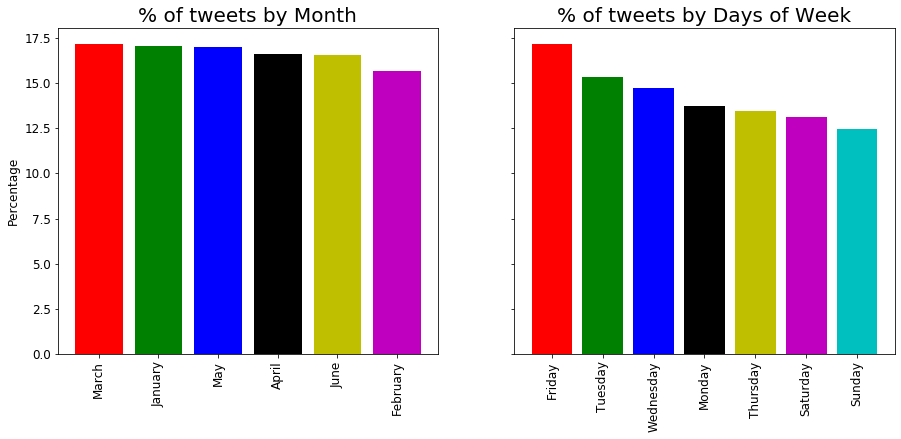

In [10]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.timestamp.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month')

df["dayName"] = df.timestamp.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

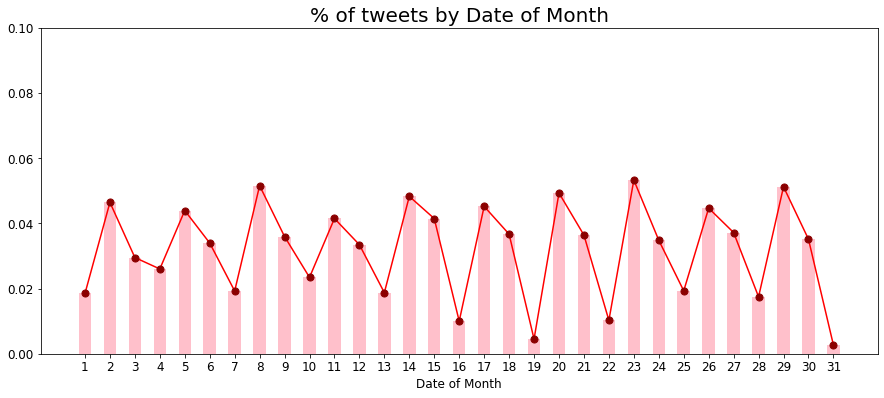

In [11]:
fig, axes = plt.subplots(figsize=(15,6))
df["dayOfMonth"] = df.timestamp.dt.day
data = df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month')

plt.show()

In [12]:
import string
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))

In [13]:
pos_df=df[df.Sentiment=='Positive']
neg_df=df[df.Sentiment=='Negative']
neu_df=df[df.Sentiment=='Neutral']

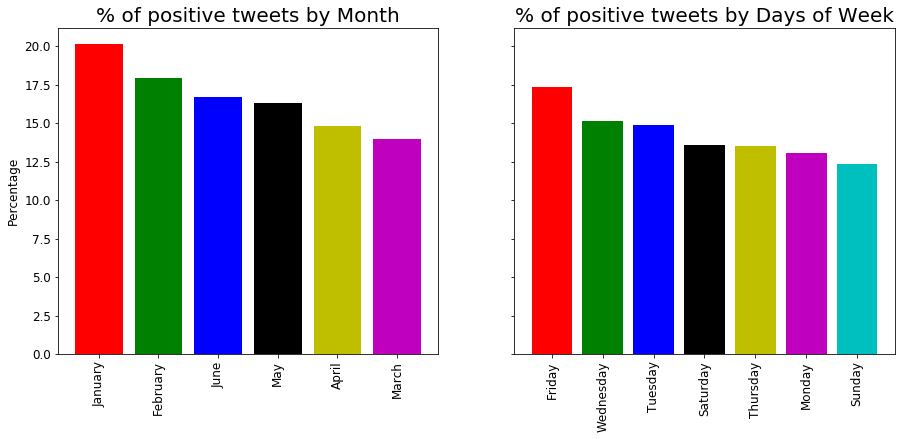

In [14]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = pos_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of positive tweets by Month')

data = pos_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of positive tweets by Days of Week')

plt.show()

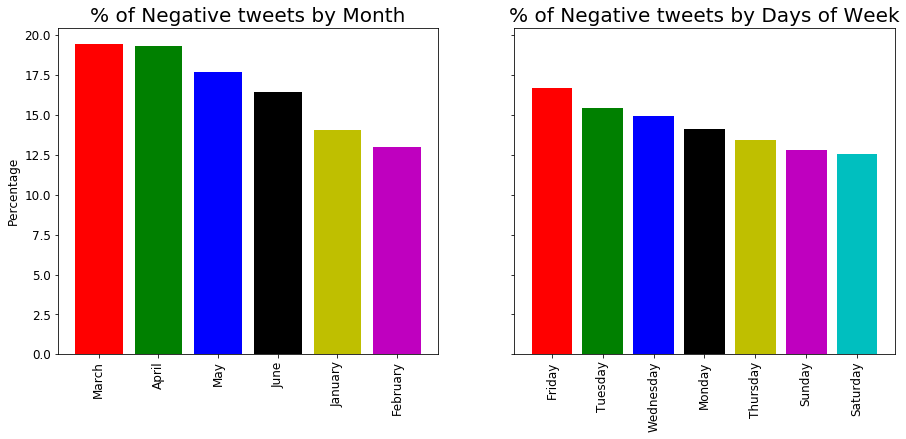

In [15]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neg_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Negative tweets by Month')

data = neg_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Negative tweets by Days of Week')

plt.show()

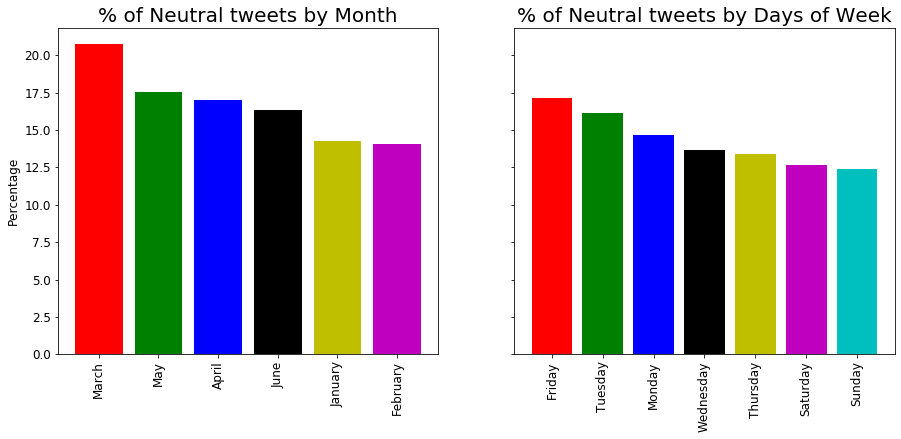

In [16]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neu_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neutral tweets by Month')

data = neu_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neutral tweets by Days of Week')

plt.show()

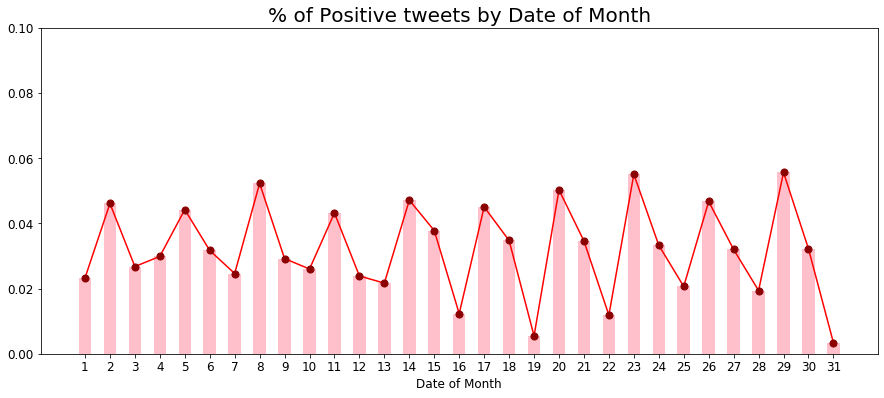

In [17]:
fig, axes = plt.subplots(figsize=(15,6))
data = pos_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Positive tweets by Date of Month')

plt.show()

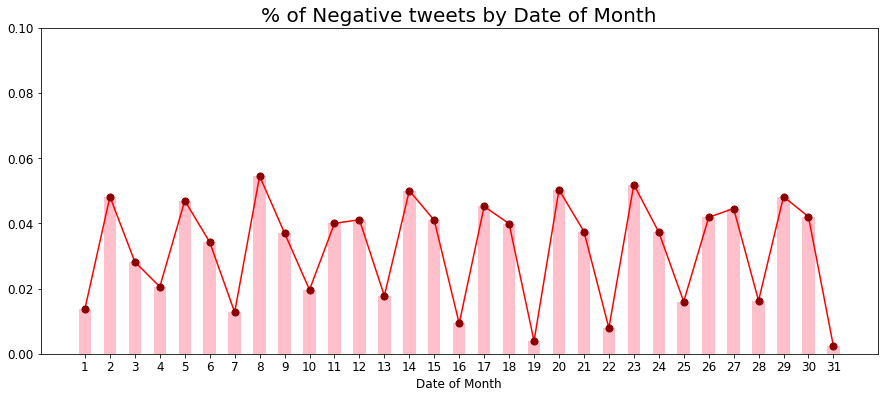

In [18]:
fig, axes = plt.subplots(figsize=(15,6))
data = neg_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Negative tweets by Date of Month')

plt.show()

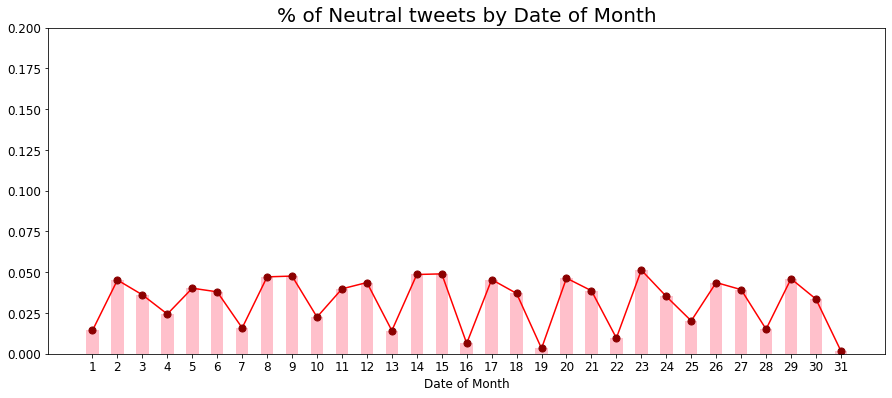

In [19]:
fig, axes = plt.subplots(figsize=(15,6))
data = neu_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.2)
axes.set_title('% of Neutral tweets by Date of Month')

plt.show()

In [20]:
consumer_key ='Jj52ijmLikNTLD3qRXSyFo2bW'
consumer_secret ='XQ3VyYt0LG5W4sotm4LfpvA99dd0KCuiD9tSZVf62Lsb02SSIJ'
access_key ='1038621976934281216-y2s3U70cy3WlUWXjx4U2uUJbfaw6LD'
access_secret ='zthp70cGjzb7VVK7cfArUuYZz7OG5KxwgJ9SG2tixhl9s'

In [21]:
from tweepy import OAuthHandler
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [22]:
def get_location(username):
    try:
        userOBJ =api.get_user(username)
        res= userOBJ.location
    except:
        res= "user suspended"
    return res

In [23]:
df['location']=df['screen_name'].apply(lambda x: get_location(x))
df

,index,hashtags,timestamp,text,screen_name,likes,retweets,compound,Sentiment,monthName,dayName,dayOfMonth,Text_cleaned,location
0,0,"[essay, someone, pay, assignment, homework, On...",2020-02-19 23:58:54,The quality of essay we write is coupled with ...,Chastewriters,0,0,0.5267,Positive,February,Wednesday,19,"[quality, essay, write, coupled, fair, afforda...","New York, USA"
1,1,[],2020-02-19 23:54:28,Let us help with your college algebra ! Check ...,mathexperts1,0,0,0.4574,Positive,February,Wednesday,19,"[let, us, help, college, algebra, check, hire,...",
2,2,"[business, Math, Algebra, Calculus, Statistics...",2020-02-19 23:54:00,Hello there! Kindly HMU for; \n#business law\n...,Ewritingservic2,1,0,0.4753,Positive,February,Wednesday,19,"[hello, kindly, hmu, business, law, math, alge...",washington
3,3,"[helloworld, Math, Algebra, Calculus, Statisti...",2020-02-19 23:50:59,#helloworld\n#Math\n#Algebra\n#Calculus\n#Stat...,freelancers01,0,0,-0.1027,Negative,February,Wednesday,19,"[helloworld, math, algebra, calculus, statisti...",United States 🇺🇲🇬🇧🇦🇷
4,4,"[business, Math, Algebra, Calculus, Statistics...",2020-02-19 23:49:12,Hello there! Kindly HMU for; \n#business law\n...,alicesolution07,0,0,0.4753,Positive,February,Wednesday,19,"[hello, kindly, hmu, business, law, math, alge...",United States 🇺🇸
5,5,"[Pay_Stats, business, Math, Algebra, Calculus,...",2020-02-19 23:43:26,Kindly HMU for help in\n#Pay_Stats\n#business ...,alicesolution07,0,0,0.6705,Positive,February,Wednesday,19,"[kindly, hmu, help, paystats, business, law, m...",United States 🇺🇸
6,6,"[MOTS7isComing, MOTS7pic]",2020-02-19 23:42:25,getting ready for my online classes...quiz day...,MsGdG12,0,0,0.4660,Positive,February,Wednesday,19,"[getting, ready, online, classesquiz, day, goi...",Pearl of the Orient
7,7,[],2020-02-19 23:41:46,Lol noted hopefully all online classes wont be...,axdynosoy,0,0,0.6705,Positive,February,Wednesday,19,"[lol, noted, hopefully, online, classes, wont,...",ucsc
8,8,"[pay, Pay, pay, pay, pay, pay, pay, pay, pay, ...",2020-02-19 23:41:25,#pay Math \n#Pay Statistics\n#pay accounting \...,cherryJane071,0,1,-0.6597,Negative,February,Wednesday,19,"[pay, math, pay, statistics, pay, accounting, ...",
9,9,"[pay, Pay, pay, pay, pay, pay, pay, pay, pay, ...",2020-02-19 23:41:15,#pay Math \n#Pay Statistics\n#pay accounting \...,cherryJane071,0,1,-0.6597,Negative,February,Wednesday,19,"[pay, math, pay, statistics, pay, accounting, ...",


In [24]:
df.to_csv('../Datasets/OL.csv')